# ARIMA
pip install pmdarima

In [37]:
import numpy as np
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.split import temporal_train_test_split
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.auto_reg import AutoREG  
from sktime.forecasting.ets import AutoETS
#You can get moving average as a special case of ARIMA, by switching off the AR and I parts. MA stands for moving average.
#Use any of the ARIMA models in sktime with p=0 and d=0. The q parameter determines the order of the moving average. More precisely, ARIMA (0, 0, q) = MA(q).

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

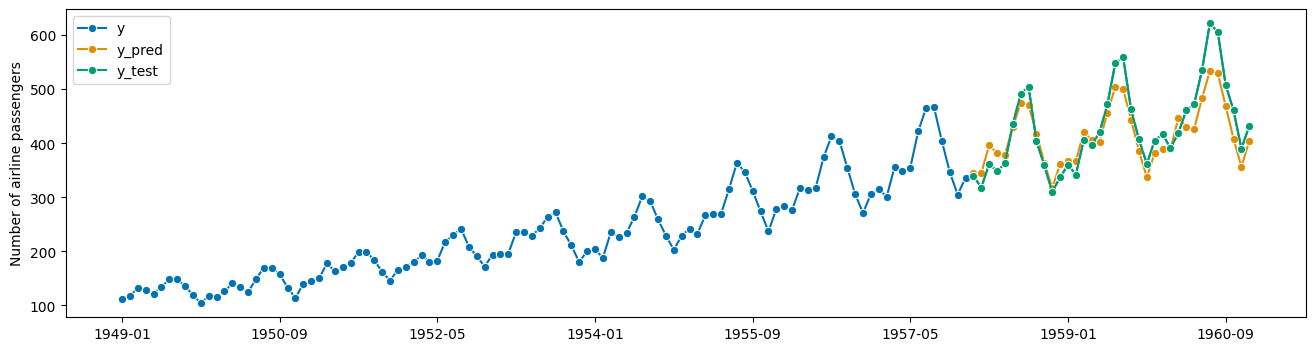

In [38]:
y = load_airline()

y_train, y_test = temporal_train_test_split(y, test_size=36)

fh = np.arange(1, 37)

# forecaster = NaiveForecaster(strategy="last", sp=12)
# forecaster = ARIMA(  
#     order=(1, 1, 0),
#     seasonal_order=(0, 1, 0, 12),
#     suppress_warnings=True)
# forecaster = AutoREG(lags=24, trend="c")  
forecaster = AutoETS(auto=True, n_jobs=-1, sp=12)  
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y, y_pred, y_test, labels=["y", "y_pred", "y_test"])